# Glass Identification

## Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-

1. Id number: 1 to 214  

2. RI: refractive index  

3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)  

4. Mg: Magnesium  

5. Al: Aluminum  

6. Si: Silicon  

7. K: Potassium  

8. Ca: Calcium  
9. Ba: Barium  

10. Fe: Iron  

11. Type of glass: (class attribute)  

•	1- building_windows_float_processed  
•	2- building_windows_non_float_processed  
•	3- vehicle_windows_float_processed  
•	4- vehicle_windows_non_float_processed (none in this database)  
•	5- containers  
•	6- tableware  
•	7- headlamps 

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass

## Importing Libraries & Data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv', names = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])

## Understanding the Data

In [11]:
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.52,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.52,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.52,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.52,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [13]:
df.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00
mean,107.50,1.52,13.41,2.68,1.44,72.65,0.50,8.96,0.18,0.06,2.78
std,61.92,0.00,0.82,1.44,0.50,0.77,0.65,1.42,0.50,0.10,2.10
min,1.00,1.51,10.73,0.00,0.29,69.81,0.00,5.43,0.00,0.00,1.00
25%,54.25,1.52,12.91,2.11,1.19,72.28,0.12,8.24,0.00,0.00,1.00
50%,107.50,1.52,13.30,3.48,1.36,72.79,0.56,8.60,0.00,0.00,2.00
75%,160.75,1.52,13.82,3.60,1.63,73.09,0.61,9.17,0.00,0.10,3.00
max,214.00,1.53,17.38,4.49,3.50,75.41,6.21,16.19,3.15,0.51,7.00


In [14]:
df.isnull().any()

ID      False
RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [15]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

## Preparation of the Data

In [16]:
df = df.drop(['ID'], axis=1)

## Understanding Features

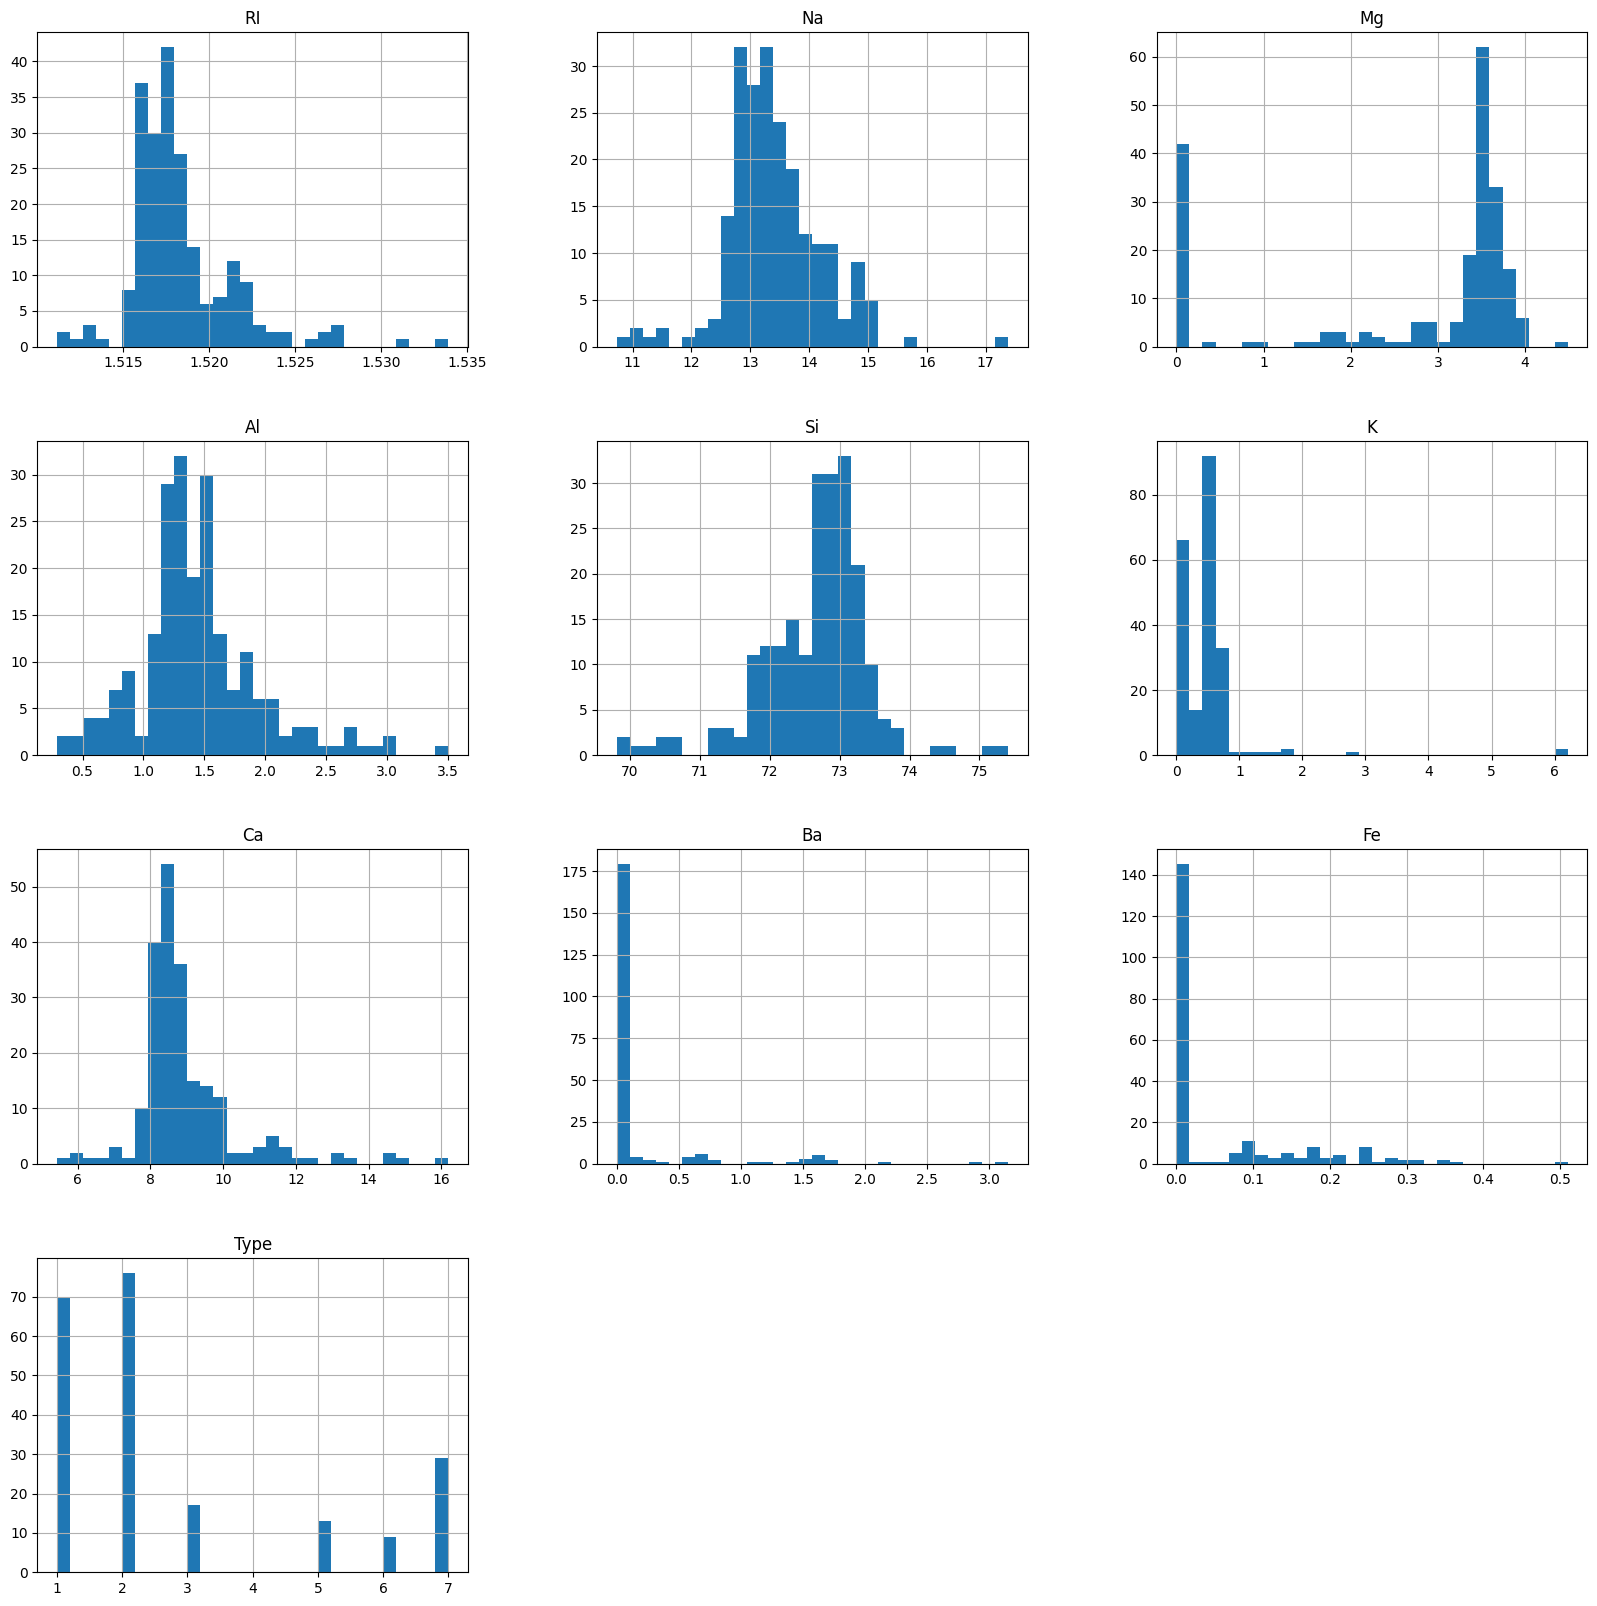

In [17]:
df.hist(bins=30,figsize=(20,20));

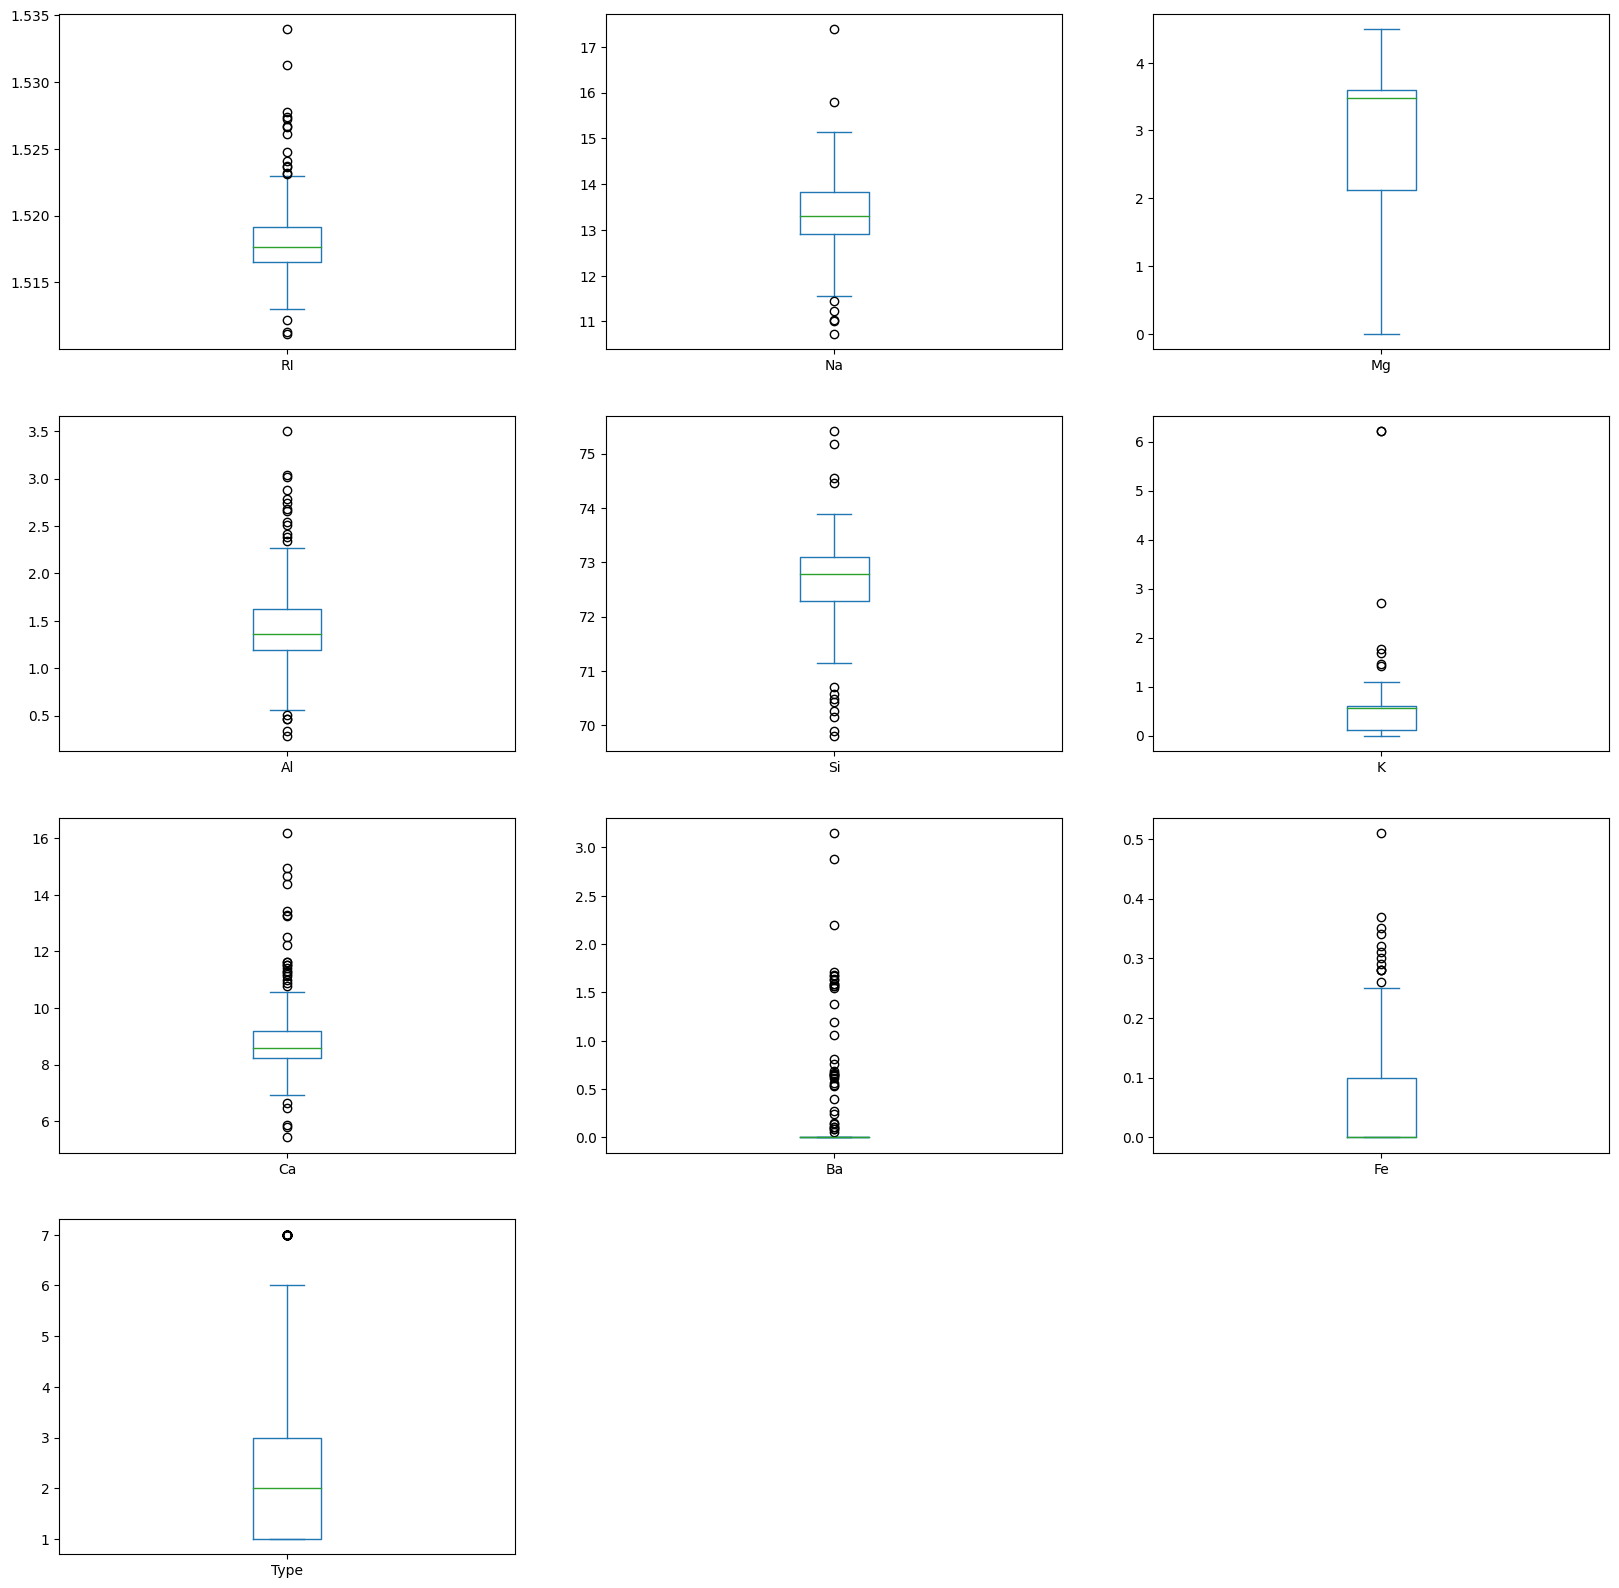

In [18]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(20,20));

## Understanding Feature Relationships

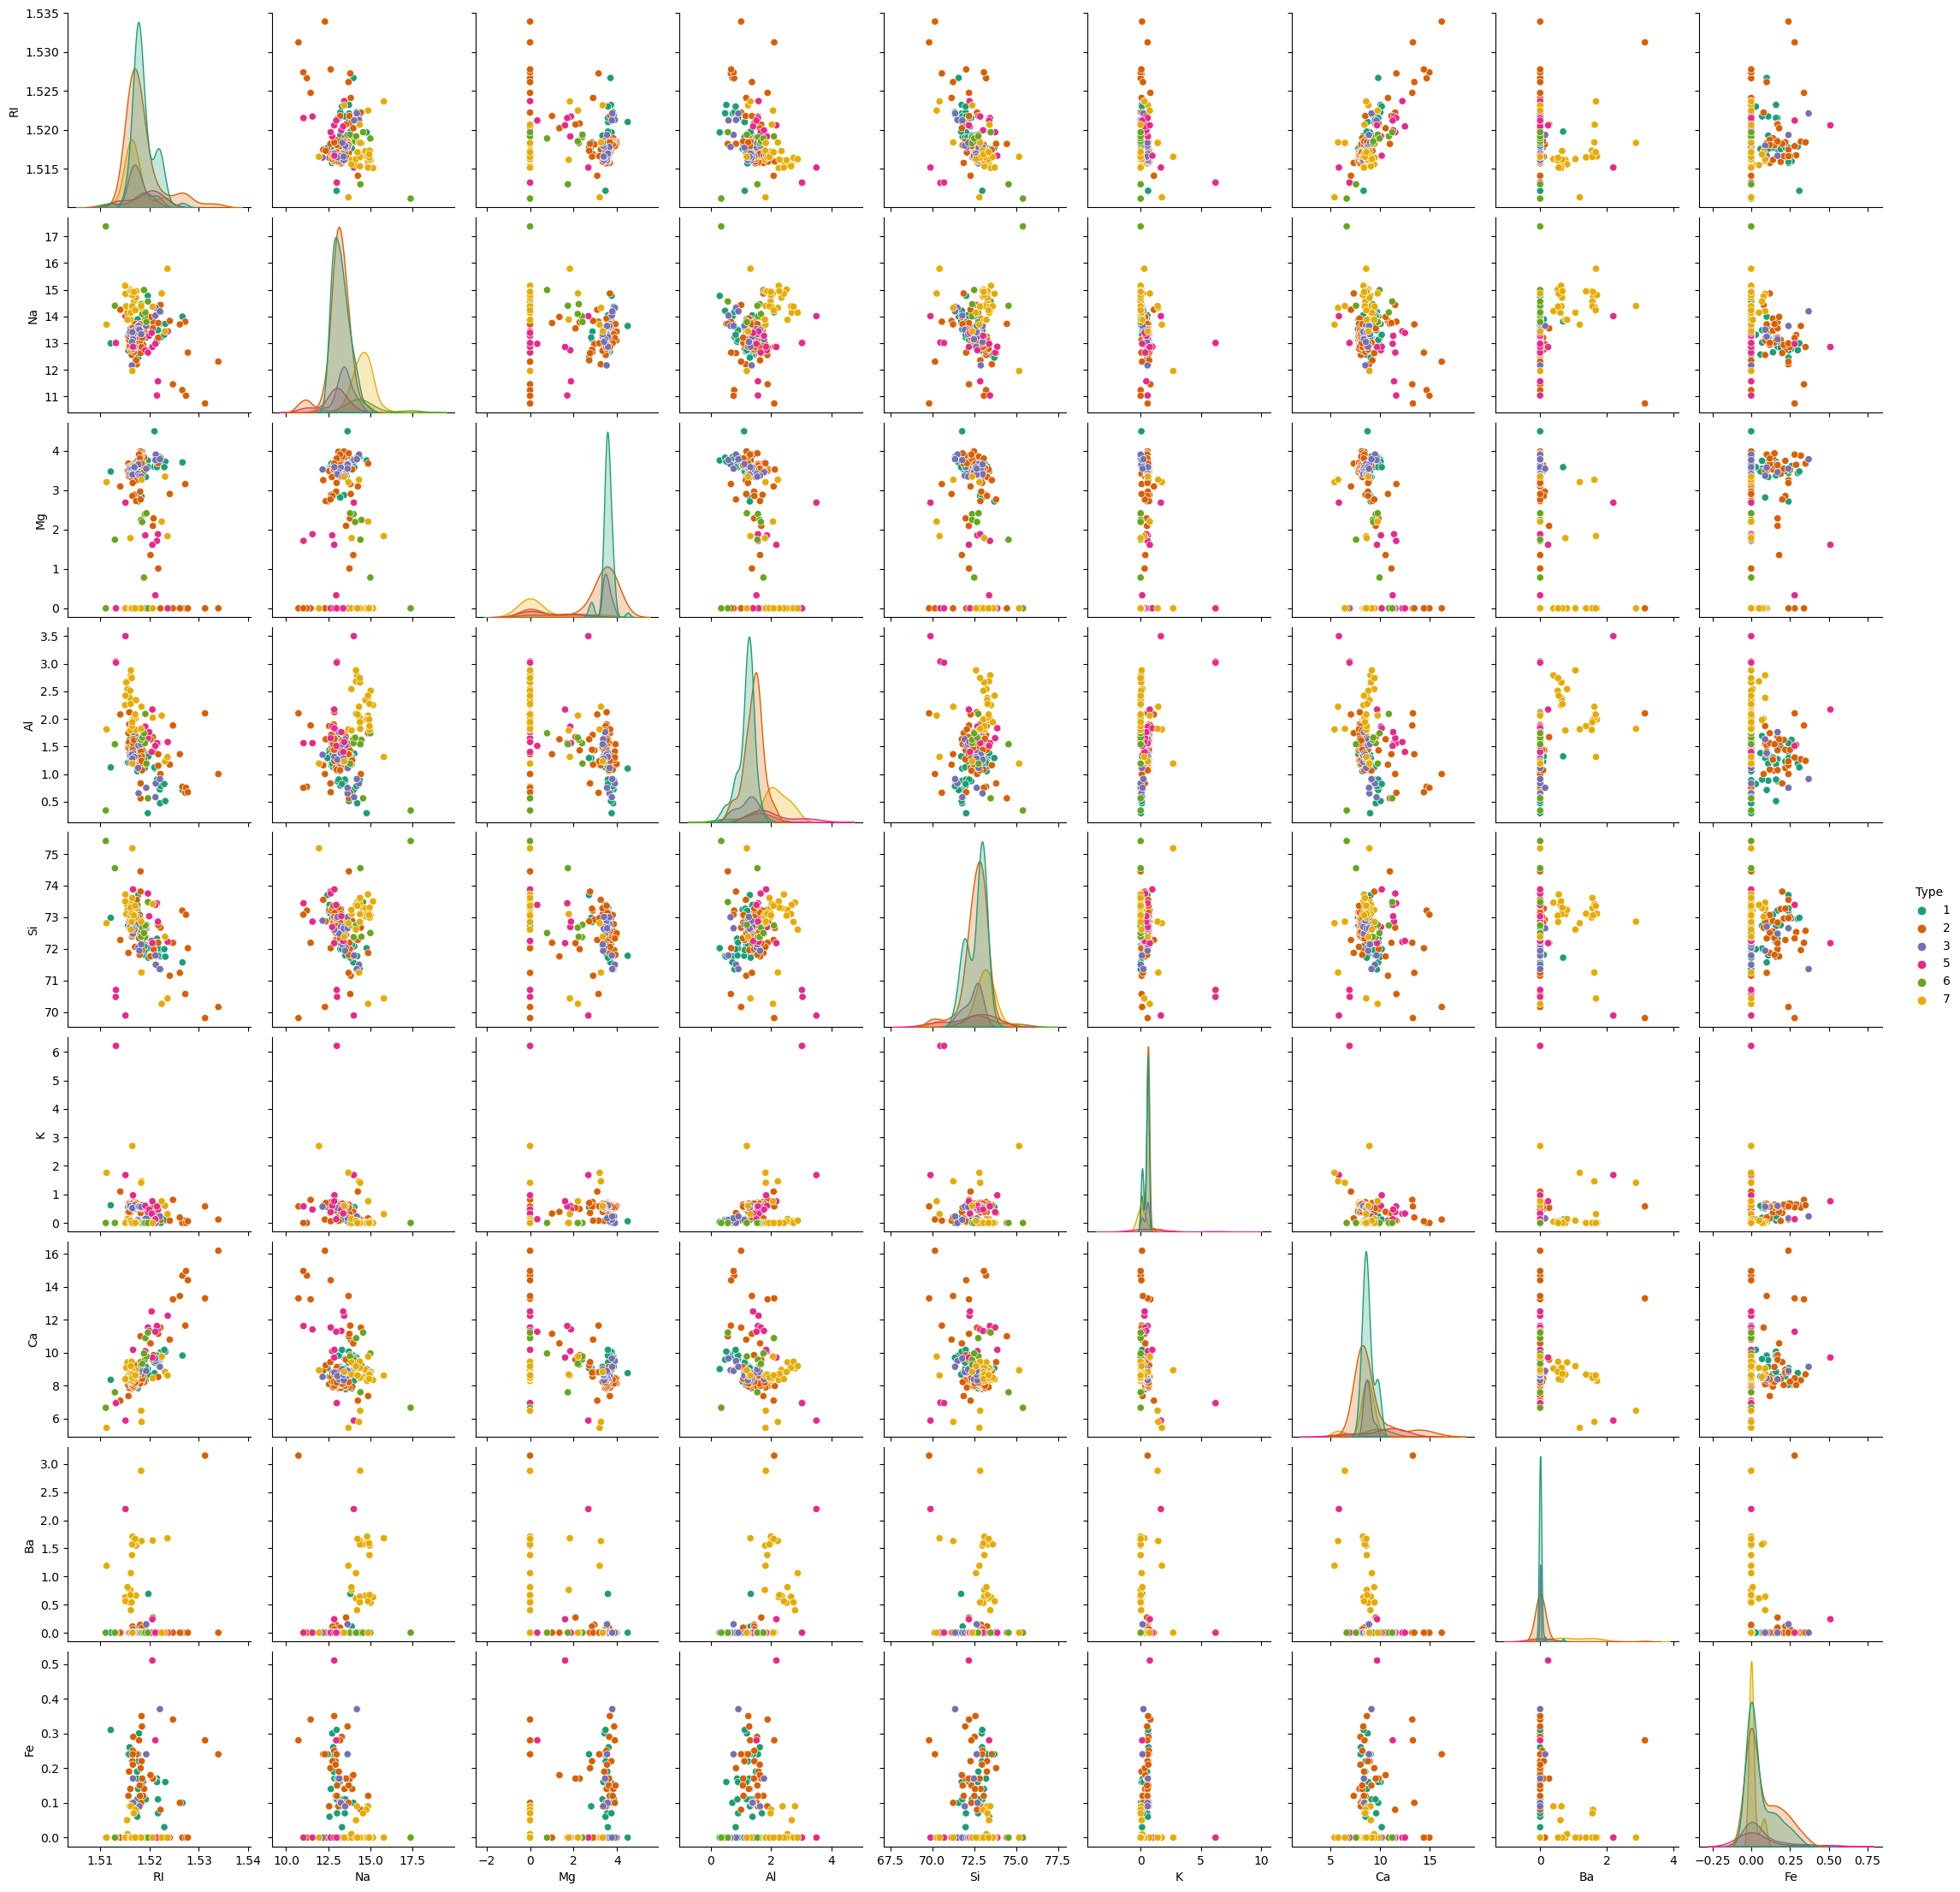

In [11]:
sns.pairplot(df, palette="Dark2", hue='Type');

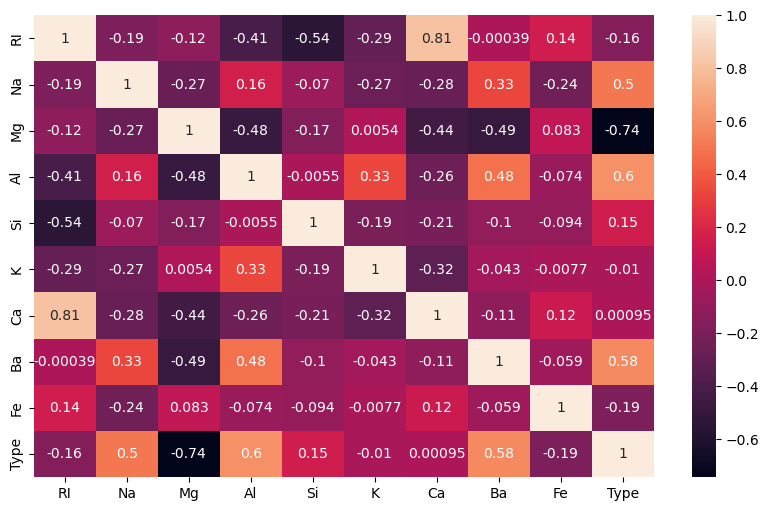

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True);

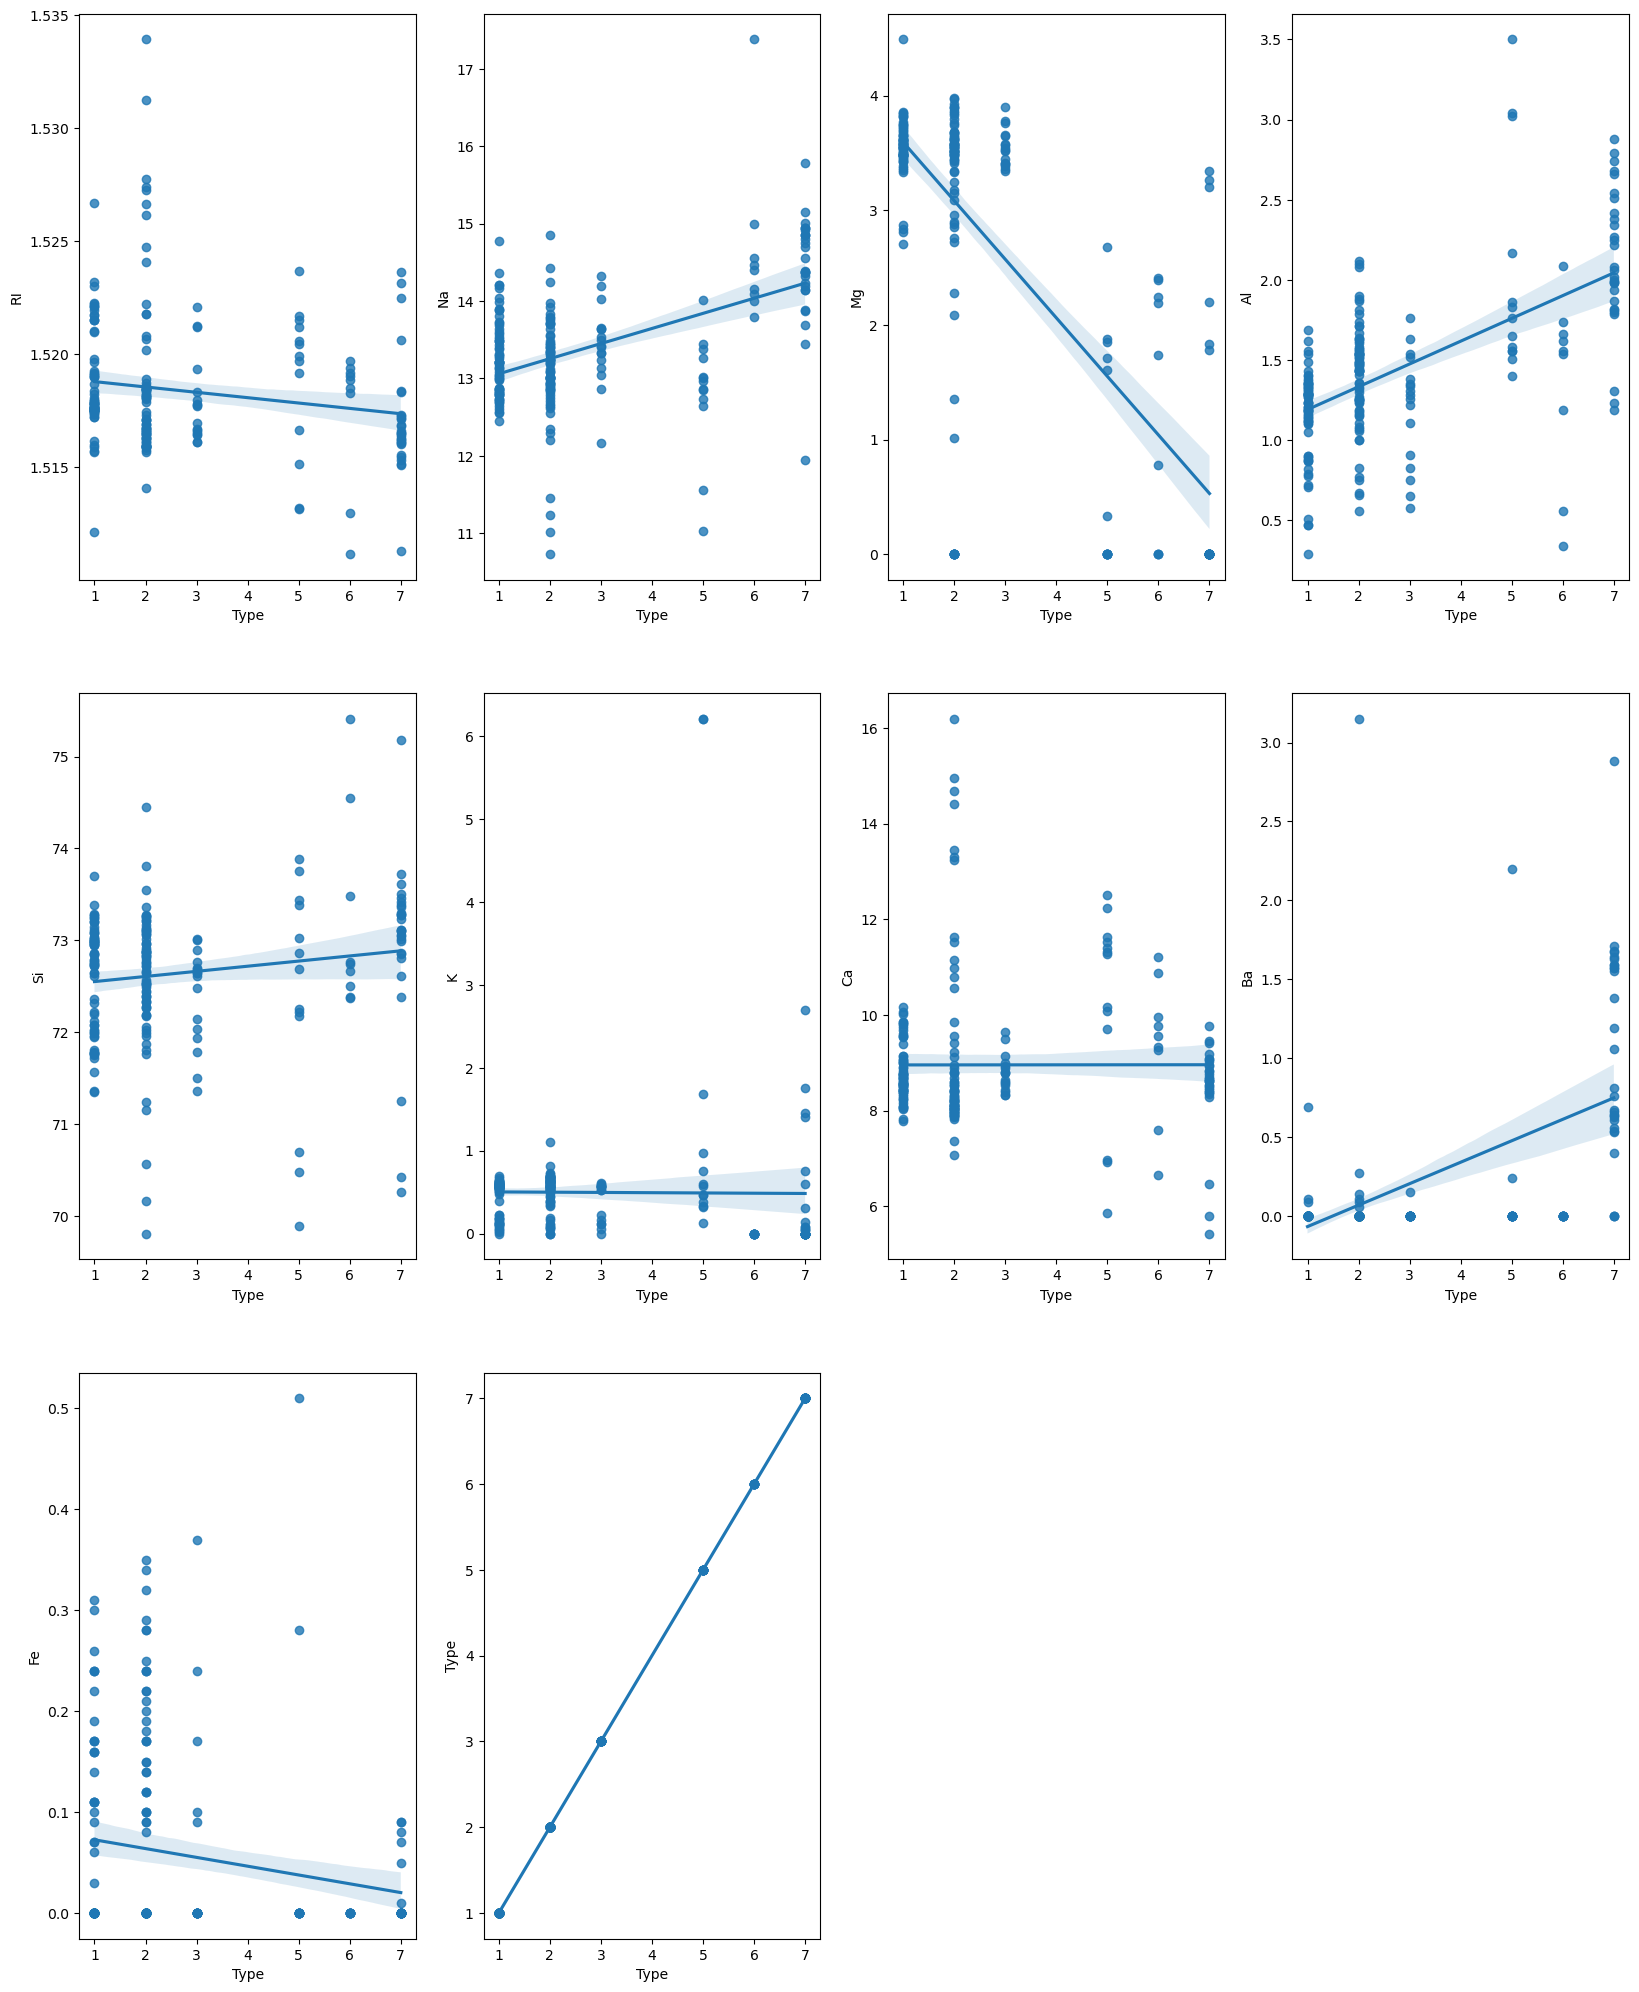

In [13]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=11:
        plt.subplot(3, 4 ,p)
        sns.regplot(x='Type', y=i, data=df)
        plt.xlabel('Type')
        plt.ylabel(i)
    p+=1
plt.show()

## Model Preparation

In [14]:
df_skew = df.skew()
df_skew

RI      1.63
Na      0.45
Mg     -1.15
Al      0.91
Si     -0.73
K       6.55
Ca      2.05
Ba      3.42
Fe      1.75
Type    1.11
dtype: float64

In [15]:
df = df.drop(['Ca', 'K'], axis=1)

In [16]:
df_skew = df.skew()
df_skew

RI      1.63
Na      0.45
Mg     -1.15
Al      0.91
Si     -0.73
Ba      3.42
Fe      1.75
Type    1.11
dtype: float64

In [17]:
for index, value in df_skew.iteritems():
    if value > 0.5:
        df[index] = np.cbrt(df[index])
df.skew()

RI      1.62
Na      0.45
Mg     -1.15
Al     -0.20
Si     -0.73
Ba      2.07
Fe      0.89
Type    0.72
dtype: float64

In [18]:
x = df.drop(['Type'], axis=1)
y = df[['Type']]

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,9508.95,RI
1,357.56,Na
2,6.90,Mg
3,105.92,Al
4,8632.64,Si
5,2.33,Ba
6,1.55,Fe


In [20]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [21]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,3.91,RI
1,1.86,Na
2,2.74,Mg
3,3.04,Al
4,2.64,Si
5,1.98,Ba
6,1.06,Fe


In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

## Model Creation

In [23]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
reg_models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)
print(reg_models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:05<00:00,  7.05it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 7
[LightGBM] [Info] Start training from score 1.304150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

## Model Evaluation

In [24]:
gb_clf = GradientBoostingRegressor(random_state = 39)

<IPython.core.display.Javascript object>

In [25]:
gb_clf.fit(xtrain,ytrain)

GradientBoostingRegressor(random_state=39)

In [26]:
ypred = gb_clf.predict(xtest)

In [27]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.6953168640551671

In [28]:
gb_clf.score(xtrain,ytrain)

0.9862558166161876

In [29]:
from sklearn.metrics import mean_squared_error
err = [mean_squared_error(ytest,ypred) for ypred in gb_clf.staged_predict(xtest)]

In [30]:
bst_est = np.argmin(err)

In [31]:
Final_model = GradientBoostingRegressor(n_estimators=bst_est,max_depth=3)

<IPython.core.display.Javascript object>

In [32]:
Final_model.fit(xtrain,ytrain)

GradientBoostingRegressor(n_estimators=70)

In [33]:
Final_model.score(xtest,ytest)

0.7013596957184682